In [1]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
(-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
(-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

### method 1

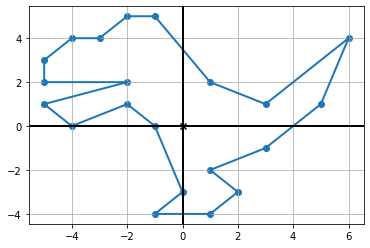

In [10]:
import matplotlib.pyplot as plt
import numpy as np
dino_vectors1 = np.array(dino_vectors)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1])
plt.plot(dino_vectors1[:,0],dino_vectors1[:,1],linewidth=2, linestyle='-',color="tab:blue")
plt.plot(*list(zip(dino_vectors1[0],dino_vectors1[-1])),linewidth=2, linestyle='-',color="tab:blue")
plt.grid(True)
plt.scatter([0],[0], color='k', marker='x')
plt.gca().axhline(linewidth=2, color='k')
plt.gca().axvline(linewidth=2, color='k')

### method 2

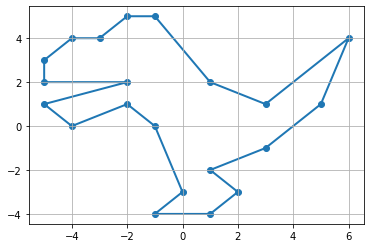

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
dino_vectors1 = np.array(dino_vectors)
p = Polygon(dino_vectors1, closed=True,fill=False,color="tab:blue",linewidth=2)
plt.gca().add_patch(p)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1])
plt.grid()

In [14]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

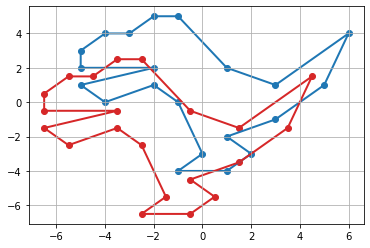

In [15]:
import matplotlib.pyplot as plt
import numpy as np
p = Polygon(dino_vectors1, closed=True,fill=False,color="tab:blue",linewidth=2)
plt.gca().add_patch(p)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1],color="tab:blue")
plt.grid()

dino_vectors2 = np.array(dino_vectors2)
p = Polygon(dino_vectors2, closed=True,fill=False,color="tab:red",linewidth=2)
plt.gca().add_patch(p)
plt.scatter(dino_vectors2[:,0],dino_vectors2[:,1],color="tab:red")



In [16]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

In [17]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

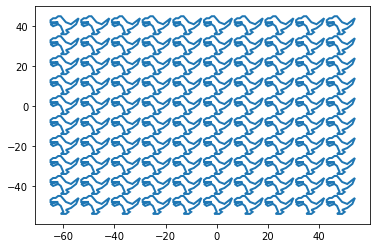

In [22]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

def hundred_dinos():
    #fig, ax = plt.subplots(figsize=(10,10))
    translations = [(12*x,10*y)
                for x in range(-5,5)
                for y in range(-5,5)]
    dinos = [translate(t, dino_vectors) for t in translations]
    for dino in dinos:
        dino = np.array(dino)
        p = Polygon(dino, closed=True,fill=False,color="tab:blue",linewidth=2)
        plt.gca().add_patch(p)
        #plt.plot(dino[:,0],dino[:,1],color="tab:blue")
        plt.plot()
hundred_dinos()    

In [24]:
from math import sin, cos, pi
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [1]:
from math import atan2
atan2(3,-2)

2.158798930342464

### numpy.arctan2: numpy version of math.atan2

In [2]:
import numpy as np
np.arctan2(3,-2)

2.158798930342464

In [26]:
from math import asin
sin(1),asin(0.8414709848078965)

(0.8414709848078965, 1.0)

In [27]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [28]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [29]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [30]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

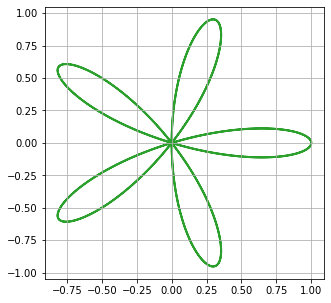

In [32]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
p = Polygon(vectors, closed=True,fill=False,color="tab:green",linewidth=2)
fig, ax = plt.subplots(figsize=(5,5))
plt.gca().add_patch(p)
plt.plot()
plt.grid()

In [33]:
from math import atan
atan(-3/2)

-0.982793723247329

In [34]:
atan2(-3,2)

-0.982793723247329

In [35]:
atan2(3,-2)

2.158798930342464

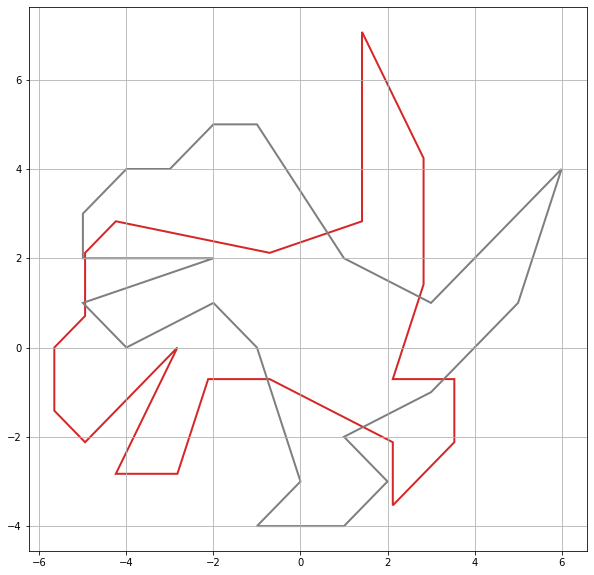

In [36]:
rotation_angle = pi/4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]
fig, ax = plt.subplots(figsize=(10,10))
dino_rotated = np.array(dino_rotated)
p = Polygon(dino_rotated, closed=True,fill=False,color="tab:red",linewidth=2)
plt.gca().add_patch(p)
dino_vectors = np.array(dino_vectors)
p = Polygon(dino_vectors, closed=True,fill=False,color="tab:grey",linewidth=2)
plt.gca().add_patch(p)
plt.plot()
plt.grid()

### 2.5 Drawing with Matplotlib

In [127]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'

class Polygon():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Points():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors(objects):
    for object in objects:
        if type(object) == Polygon:
            for v in object.vertices:
                yield v
        elif type(object) == Points:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow:
            yield object.tip
            yield object.tail
        elif type(object) == Segment:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon:
            for i in range(0,len(object.vertices)):
                x1, y1 = object.vertices[i]
                x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                xs = [v[0] for v in object.vertices]
                ys = [v[1] for v in object.vertices]
                plt.gca().fill(xs,ys,object.fill,alpha=object.alpha)
        elif type(object) == Points:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

    if save_as:
        plt.savefig(save_as)

    plt.show()